In [2]:
import pandas as pd
import numpy as np
import os 
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st


In [3]:
#Read Calendar 1 xlsx file
file1 = "c://Learn//Project1//Resources//Seattle_calendar1.xlsx"
Seattle_df1 = pd.read_excel(file1)
Seattle_df1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
Seattle_df1.describe()

,listing_id,price
count,5.222380e+05,348432.000000
mean,5.522758e+06,152.202599
std,2.941194e+06,121.442776
min,6.606000e+03,12.000000
25%,3.291295e+06,83.000000
50%,6.004058e+06,117.000000
75%,8.029177e+06,175.000000
max,1.031037e+07,1650.000000


In [4]:
#use dropna
Seattle_df1 = Seattle_df1.dropna(how="any")
Seattle_df1.count()

listing_id    348432
date          348432
available     348432
price         348432
dtype: int64

In [4]:
 #Read Calendar2 xlsx file
file2 = "c://Learn//Project1//Resources//Seattle_calendar2.xlsx"
Seattle_df2 = pd.read_excel(file2)
Seattle_df2.head()

,listing_id,date,available,price
0,6850007,2016-10-18,t,130.0
1,6850007,2016-10-19,t,130.0
2,6850007,2016-10-20,t,130.0
3,6850007,2016-10-21,t,130.0
4,6850007,2016-10-22,t,130.0


In [5]:
# Combine 2 dataframe
df_final_Seattle = pd.concat([Seattle_df1, Seattle_df2])

df_final_Seattle.count()

listing_id    1048575
date          1048575
available     1048575
price          699862
dtype: int64

In [6]:
df_final_Seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
#Create year
df_final_Seattle['year'] = df_final_Seattle['date'].dt.year
df_final_Seattle.head()

,listing_id,date,available,price,year
0,241032,2016-01-04,t,85.0,2016
1,241032,2016-01-05,t,85.0,2016
2,241032,2016-01-06,f,NaN,2016
3,241032,2016-01-07,f,NaN,2016
4,241032,2016-01-08,f,NaN,2016


In [8]:
# fill rows as Seattle 
df_final_Seattle['Location'] = 'Seattle'
df_final_Seattle.head()

,listing_id,date,available,price,year,Location
0,241032,2016-01-04,t,85.0,2016,Seattle
1,241032,2016-01-05,t,85.0,2016,Seattle
2,241032,2016-01-06,f,NaN,2016,Seattle
3,241032,2016-01-07,f,NaN,2016,Seattle
4,241032,2016-01-08,f,NaN,2016,Seattle


In [9]:
#confirm count
df_final_Seattle.count()

listing_id    1048575
date          1048575
available     1048575
price          699862
year          1048575
Location      1048575
dtype: int64

In [10]:
# use dropna

df_final_Seattle= df_final_Seattle.dropna(how = "any")
df_final_Seattle.count()

listing_id    699862
date          699862
available     699862
price         699862
year          699862
Location      699862
dtype: int64

In [11]:
#add Month Column
df_final_Seattle['month'] = df_final_Seattle['date'].dt.month
df_final_Seattle.tail()

,listing_id,date,available,price,year,Location,month
526332,5386937,2016-10-20,t,120.0,2016,Seattle,10
526333,5386937,2016-10-21,t,120.0,2016,Seattle,10
526334,5386937,2016-10-22,t,120.0,2016,Seattle,10
526335,5386937,2016-10-23,t,120.0,2016,Seattle,10
526336,5386937,2016-10-24,t,120.0,2016,Seattle,10


In [12]:
df_final_Seattle.tail()

,listing_id,date,available,price,year,Location,month
526332,5386937,2016-10-20,t,120.0,2016,Seattle,10
526333,5386937,2016-10-21,t,120.0,2016,Seattle,10
526334,5386937,2016-10-22,t,120.0,2016,Seattle,10
526335,5386937,2016-10-23,t,120.0,2016,Seattle,10
526336,5386937,2016-10-24,t,120.0,2016,Seattle,10


In [14]:
# Separate years
df_final_Seattle ['month_of_year'] = [f"{year}-{month:02d}" for year, month in zip(df_final_Seattle ['year'], df_final_Seattle ['month'])  ]
monthly_avg_price = df_final_Seattle.groupby('month_of_year')['price'].mean()
monthly_avg_price 


                              

month_of_year
2016-01    123.817818
2016-02    126.325086
2016-03    131.108504
2016-04    137.792685
2016-05    142.738599
2016-06    150.736863
2016-07    155.263716
2016-08    153.568647
2016-09    145.891914
2016-10    139.166124
2016-11    137.422926
2016-12    139.260159
2017-01    138.410484
Name: price, dtype: float64

In [15]:
monthly_avg_price.index

Index(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01'],
      dtype='object', name='month_of_year')

In [17]:
monthly_avg_price.values

array([123.81781807, 126.32508604, 131.10850352, 137.79268548,
       142.73859868, 150.73686302, 155.26371579, 153.56864706,
       145.89191392, 139.16612441, 137.42292633, 139.2601586 ,
       138.41048444])

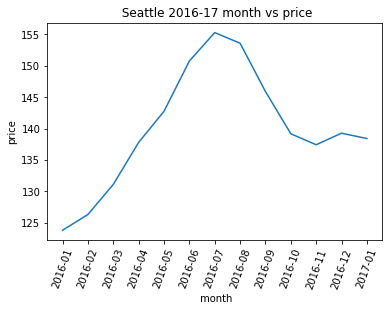

finished


In [19]:
#2016 month vs price line plot


x= monthly_avg_price.index
y = monthly_avg_price.values 

plt.plot(x,y)
#plt.line(df_final_boston.iloc[:,6],[df_final_boston.iloc[:,3]])
plt.xlabel(' month')
plt.xticks(rotation=70)
plt.ylabel('price')
plt.title(" Seattle 2016-17 month vs price")
plt.savefig('Seattle 2016-17 month vs price')
plt.show()

print("finished")

In [18]:
#Create DataFrame
group_by_2017 = pd.DataFrame(group_2017_df).reset_index()
group_by_2017

,month,price
0,1,138.410484


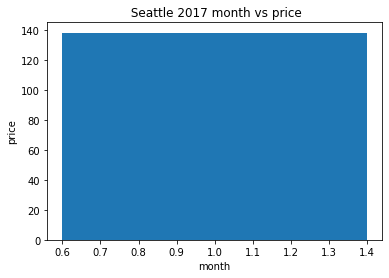

In [19]:
#2017 month vs Price line plot
x= group_by_2017['month']
y = group_by_2017["price"] 

plt.bar(x,y)
#plt.line(df_final_boston.iloc[:,6],[df_final_boston.iloc[:,3]])
plt.xlabel('month')
plt.ylabel('price')
plt.title(" Seattle 2017 month vs price")
plt.savefig("Seattle 2017 month vs price")
plt.show()